Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", l

RMSE: 16740.138679113523
MAE: 13613.450456285735
R² Score: 0.9973646373104122


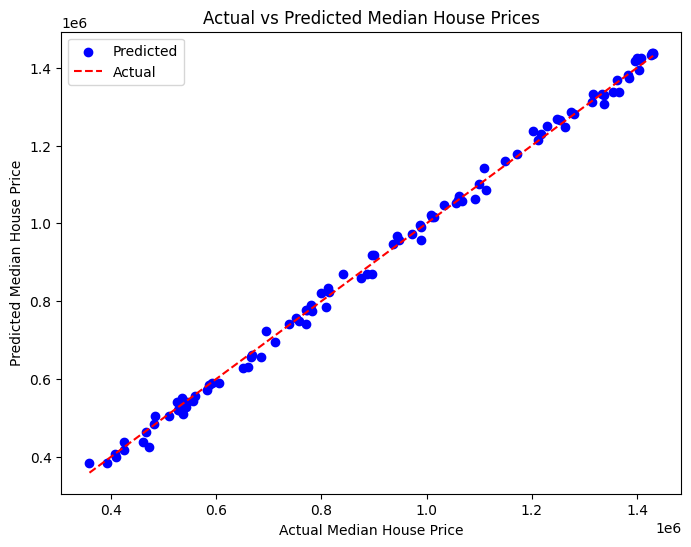

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Load your dataset
# Ensure the file path is correct or provide the dataset if it's missing
merged_dfs = pd.read_csv('Merge_Economic_HouseTrend_Data.csv')

# Define predictors and target variable
predictors = ["Mortgage Interest", "Vacancy Rate", "CPI", "Median Sales Price"]
target = "Median House Price"

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(merged_dfs[predictors], merged_dfs[target], test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Save the model to a .pkl file
joblib.dump(best_rf, 'random_forest_model.pkl')

# Predictions for the test set
best_preds = best_rf.predict(X_test)

# Calculate metrics for the test set predictions
rmse = np.sqrt(mean_squared_error(y_test, best_preds))
mae = mean_absolute_error(y_test, best_preds)
r2 = r2_score(y_test, best_preds)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

# Scatter plot of actual vs predicted median house prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_preds, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Median House Price')
plt.ylabel('Predicted Median House Price')
plt.title('Actual vs Predicted Median House Prices')
plt.legend()
plt.show()
